Import Library

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

Memuat dan Visualisasikan Data MNIST


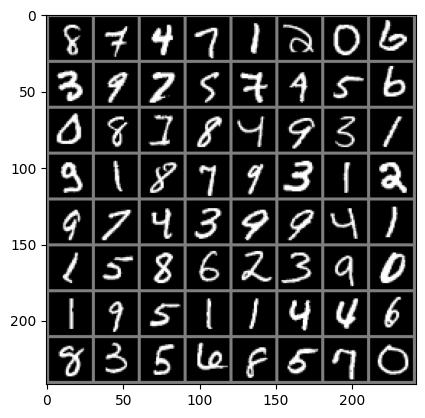

Label:     8     7     4     7


In [ ]:
# Menentukan transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Muat data pelatihan dan pengujian MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Visualisasikan beberapa contoh data
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Ambil beberapa contoh data pelatihan
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Tampilkan gambar
imshow(torchvision.utils.make_grid(images))
print('Label:', ' '.join(f'{labels[j]:5d}' for j in range(4)))


Rancang Model Jaringan Neural


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten gambar
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = NeuralNetwork()

Siapkan Hyperparameter dan Pelatihan


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Loop pelatihan
for epoch in range(5):  # Ganti jumlah epoch sesuai kebutuhan
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}')

print('Pelatihan selesai')


Epoch 1, Loss: 1.0712640947783425
Epoch 2, Loss: 0.3933494539975103
Epoch 3, Loss: 0.3317721552972092
Epoch 4, Loss: 0.3001306877175628
Epoch 5, Loss: 0.2748243835832137
Pelatihan selesai


Evaluasi Model


In [ ]:
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.numpy())

print('Akurasi Model di atas data pengujian: %d %%' % (100 * correct / total))

# Matriks Konfusi
conf_matrix = confusion_matrix(all_labels, all_preds)
print('Matriks Konfusi:')
print(conf_matrix)

# Laporan Klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(all_labels, all_preds))


Akurasi Model di atas data pengujian: 92 %
Matriks Konfusi:
[[ 957    0    2    1    0    9    6    2    3    0]
 [   0 1104    2    2    1    4    4    2   16    0]
 [   9    9  923   13   12    1   11   14   35    5]
 [   2    1   11  906    1   38    2   14   26    9]
 [   1    1    4    0  916    2    9    3    5   41]
 [   9    3    3   30    5  791   14    4   26    7]
 [  10    3    3    0   16   19  902    1    4    0]
 [   4    8   22    4    8    0    0  945    3   34]
 [   7    3    3   17   10   32    9    7  879    7]
 [  11    7    1    9   31    8    1   13    7  921]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.95      0.89      0.92      1032
           3       0.92      0.90      0.91      1010
           4       0.92      0.93      0.92       982
           5       0.88      0.89      0.88       892
         

Hasil evaluasi dari model klasifikasi digit tulisan tangan MNIST yang telah dilatih. Mari kita jelaskan hasilnya berdasarkan output yang dihasilkan:

1. Akurasi Model:
   Akurasi model pada dataset pengujian adalah 92%. Ini berarti model dapat mengenali digit dengan benar untuk sekitar 92% dari gambar digit di dataset pengujian. Ini adalah metrik yang baik, meskipun ada ruang untuk perbaikan.

2. Matriks Konfusi:
   Matriks konfusi digunakan untuk mengukur kinerja model dalam mengklasifikasikan setiap kelas digit secara lebih detail. Matriks ini memiliki dimensi 10x10 di mana setiap baris mewakili kelas sebenarnya, dan setiap kolom mewakili kelas yang diprediksi. Misalnya, elemen [0, 0] adalah 957, yang berarti ada 957 gambar digit 0 yang diklasifikasikan dengan benar.

   Dapat dilihat bahwa ada beberapa angka di luar diagonal utama yang menunjukkan digit yang salah diklasifikasikan. Misalnya, pada baris pertama, ada beberapa digit 0 yang salah diklasifikasikan sebagai digit 2, 3, atau 5. Hal serupa terjadi untuk kelas digit lainnya.

3. Laporan Klasifikasi:
   Laporan klasifikasi memberikan informasi lebih rinci tentang metrik kinerja untuk setiap kelas digit. Dalam laporan ini, dapat dilihat metrik seperti presisi, recall, dan F1-score untuk setiap kelas, serta rata-rata dari semua kelas.

   - Presisi (precision) mengukur seberapa banyak dari prediksi positif yang benar. Sebagai contoh, untuk digit 0, presisinya adalah 0,95, yang berarti sekitar 95% dari prediksi positif untuk digit 0 adalah benar.
   - Recall mengukur seberapa banyak dari semua kasus positif yang berhasil dideteksi. Sebagai contoh, untuk digit 0, recallnya adalah 0,98, yang berarti sekitar 98% dari semua digit 0 berhasil dideteksi oleh model.
   - F1-score adalah perpaduan dari presisi dan recall, yang memberikan gambaran keseluruhan tentang kinerja model.

   Dari laporan klasifikasi ini, dapat dilihat bahwa beberapa digit memiliki kinerja yang lebih baik daripada yang lain. Misalnya, digit 1 memiliki presisi dan recall yang tinggi, sementara digit 2 memiliki presisi yang rendah. Dalam kumpulan data ini, digit 2 tampaknya lebih sulit untuk diklasifikasikan dengan benar oleh model.

Kesimpulannya, model Anda memiliki akurasi yang baik (92%) dalam mengenali digit tulisan tangan pada dataset MNIST, meskipun masih ada beberapa kesalahan dalam pengklasifikasian digit tertentu. Dengan memeriksa matriks konfusi dan laporan klasifikasi, dapat diidentifikasi digit yang paling sulit dikenali oleh model dan berfokus untuk meningkatkan kinerja pada digit tersebut jika diperlukan.